In [37]:
from sys import path
path.append('/home/sand/.cfs/CFS-2023W-Linux/share/python/')
from hdf5_tools import get_result, get_step_values, get_coordinates, get_subregion_idx
import numpy as np

In [38]:
%matplotlib inline 
# must be in a seperate cell above the following commands

import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler
color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
mpl.rc('figure',figsize=[2.7,1.6]) # figure size in inch
mpl.rc('figure',dpi=400) # inline dpi (=display size in browser)
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)

Transient response damped vs. undamped
----------------------

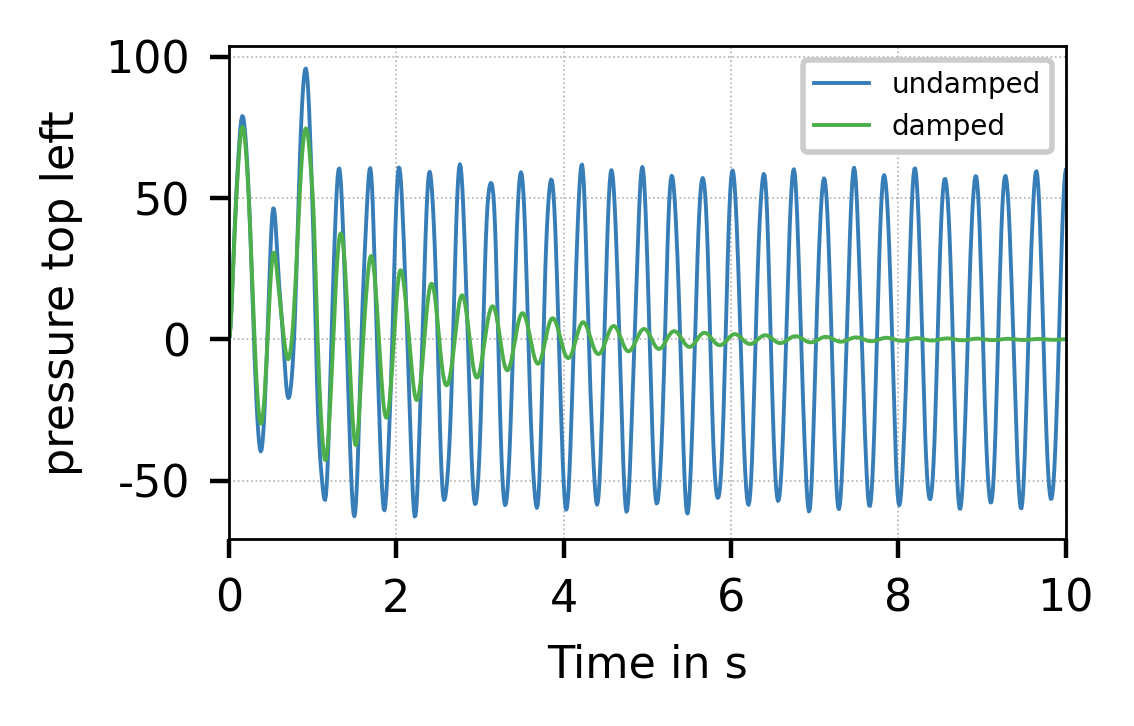

In [39]:
fig,ax = plt.subplots()
data_undamped = np.loadtxt('history/Container2DrayleighDamping_undamped-waterPressure-node-21-P_left-surf.hist')
data_damped = np.loadtxt('history/Container2DrayleighDamping-waterPressure-node-21-P_left-surf.hist')
t = data_undamped[:,0]

ax.plot(t,data_undamped[:,1],label='undamped')
ax.plot(t,data_damped[:,1],label='damped')
ax.legend(fontsize=5)

ax.set_xlabel('Time in s')
ax.set_ylabel('pressure top left')
ax.set_xlim([0,10])
plt.show()

Verify damping matrix
----------------------

In [40]:
from scipy.io import mminfo,mmread,mmwrite

# read output system matrices
M = mmread("dbg_mass_0_0.mtx").toarray() # mass matrix
C = mmread("dbg_damping_0_0.mtx").toarray() # damping matrix
K = mmread("dbg_stiffness_0_0.mtx").toarray() # stiffness matrix

In [41]:
# Damping parameters as specified in input xml
alpha=1.0
beta=1e-3

C_input = alpha*M + beta*K

# Check if output damping matrix is same as expected from given alpha and beta
print('Damping matrix output as expected? ', np.allclose(C - C_input, np.zeros_like(C - C_input), atol=1e-15))

Damping matrix output as expected?  True
